# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='adult_2017'

In [4]:
pkg.resource(resource_name)

<Resource: metadata.csv 29:1 root.datafile data/adult_2017.csv ['adult_2017', '', '']>

In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

aa5c  ab1  ab17  ab40  ab41  ab43  ab98  ab22  ab99  ab24     ...      \
0     3    1     1     0     0     0     0     1     2     0     ...       
1     3    1     1     0     0     0     0     1     2     0     ...       
2     3    3     1     0     0     0     0     1     2     0     ...       
3     3    1     1     0     0     0     0     1     2     0     ...       
4     3    3     1     0     0     0     0     0     1     1     ...       

     rakedw71    rakedw72    rakedw73     rakedw74    rakedw75    rakedw76  \
0   36.537192   36.792686   35.535625    37.823106   36.148893   37.204749   
1  645.439130  628.796135  643.667909   629.320509  632.905689  639.936105   
2  311.485892  336.390621  322.017293   319.386088  325.415401  309.667872   
3  599.620283  589.551336  598.972448   591.858705  590.493508  594.342110   
4  752.233472  764.182793    0.000000  1472.753102  749.126706  760.096371   

     rakedw77    rakedw78    rakedw79    rakedw80  
0   35.806616   38.172047   36.166655   36.052045  
1  614.440965  669.351018  731.053935  601.651793  
2  324.473075  316.781464  330.006532  308.161525  
3  614.141332  576.879339  584.758848  602.588255  
4  775.243698  742.795594  796.090196  726.403306  

[5 rows x 483 columns]

In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

count
empty         0
const         0
datetime      0
number      483
other         0

# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21153 entries, 0 to 21152
Columns: 483 entries, aa5c to rakedw80
dtypes: float64(82), int64(401)
memory usage: 77.9 MB


None

count         mean          std  min         25%         50%  \
aa5c      21153.0     3.047038     0.398216  0.0    3.000000    3.000000   
ab1       21153.0     1.582092     1.094134  0.0    1.000000    2.000000   
ab17      21153.0     0.833310     0.372708  0.0    1.000000    1.000000   
ab40      21153.0     0.233868     0.559949  0.0    0.000000    0.000000   
ab41      21153.0     0.282229     0.658540  0.0    0.000000    0.000000   
ab43      21153.0     0.232449     0.556731  0.0    0.000000    0.000000   
ab98      21153.0     0.174160     0.538794  0.0    0.000000    0.000000   
ab22      21153.0     0.886257     0.350217  0.0    1.000000    1.000000   
ab99      21153.0     1.814542     0.415828  0.0    2.000000    2.000000   
ab24      21153.0     0.213587     0.588074  0.0    0.000000    0.000000   
ab25      21153.0     0.162719     0.460830  0.0    0.000000    0.000000   
ab63      21153.0     0.275989     0.809853  0.0    0.000000    0.000000   
ab112     21153.0     0.140642     0.390931  0.0    0.000000    0.000000   
ab81      21153.0     1.096109     0.985034  0.0    0.000000    2.000000   
ab29      21153.0     0.636364     0.506245  0.0    0.000000    1.000000   
ab30      21153.0     0.458800     0.643260  0.0    0.000000    0.000000   
ab34      21153.0     0.893585     0.308376  0.0    1.000000    1.000000   
ab52      21153.0     0.182196     0.548249  0.0    0.000000    0.000000   
ab118     21153.0     0.126838     0.389362  0.0    0.000000    0.000000   
ad37w     21153.0     0.501206     0.517115  0.0    0.000000    0.000000   
ad38w     21153.0     2.888101     3.996158  0.0    0.000000    2.000000   
ad40w     21153.0     1.340283     0.491832  0.0    1.000000    1.000000   
ad41w     21153.0     3.636789     4.056175  0.0    0.000000    3.000000   
ac100     21153.0     4.520541     2.584807  0.0    2.000000    4.000000   
ac47      21153.0     5.906302     3.803578  0.0    3.000000    5.000000   
ac42      21153.0     2.680376     0.816111  0.0    3.000000    3.000000   
ac44      21153.0     3.220820     1.076577  0.0    3.000000    4.000000   
ae15      21153.0     0.611024     0.487529  0.0    0.000000    1.000000   
ae15a     21153.0     0.985770     1.330692  0.0    0.000000    0.000000   
ac49      21153.0     0.158134     0.484247  0.0    0.000000    0.000000   
...           ...          ...          ...  ...         ...         ...   
rakedw51  21153.0  1392.506831  1965.872960  0.0  221.850054  678.814167   
rakedw52  21153.0  1392.506831  1966.562088  0.0  221.937353  677.365678   
rakedw53  21153.0  1392.506831  1958.722769  0.0  221.362160  682.184880   
rakedw54  21153.0  1392.506831  1962.593527  0.0  222.403956  683.005901   
rakedw55  21153.0  1392.506831  1957.694693  0.0  223.303180  682.596966   
rakedw56  21153.0  1392.506831  1952.737319  0.0  221.982733  682.391045   
rakedw57  21153.0  1392.506831  1959.829506  0.0  221.098333  679.117385   
rakedw58  21153.0  1392.506831  1964.195334  0.0  222.104528  682.775626   
rakedw59  21153.0  1392.506831  1973.513744  0.0  220.410175  676.798651   
rakedw60  21153.0  1392.506831  1968.303931  0.0  221.215748  676.795302   
rakedw61  21153.0  1392.506831  1965.516742  0.0  222.015364  679.118732   
rakedw62  21153.0  1392.506831  1958.932000  0.0  222.298259  683.661349   
rakedw63  21153.0  1392.506831  1968.712555  0.0  222.763164  680.936508   
rakedw64  21153.0  1392.506831  1964.796194  0.0  221.310593  680.091691   
rakedw65  21153.0  1392.506831  1970.006281  0.0  220.837992  675.551257   
rakedw66  21153.0  1392.506831  1972.135546  0.0  220.420107  680.194754   
rakedw67  21153.0  1392.506831  1967.439979  0.0  222.528402  682.456438   
rakedw68  21153.0  1392.506831  1964.544374  0.0  220.900700  677.239190   
rakedw69  21153.0  1392.506831  1968.061618  0.0  222.648227  679.395518   
rakedw70  21153.0  1392.506831  1960.284246  0.0  223.287107  678.771045   
rakedw71  21153.0  1392.506831  1964.806548  0.0  220.925349

## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


/Users/eric/proj/virt/data-project/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


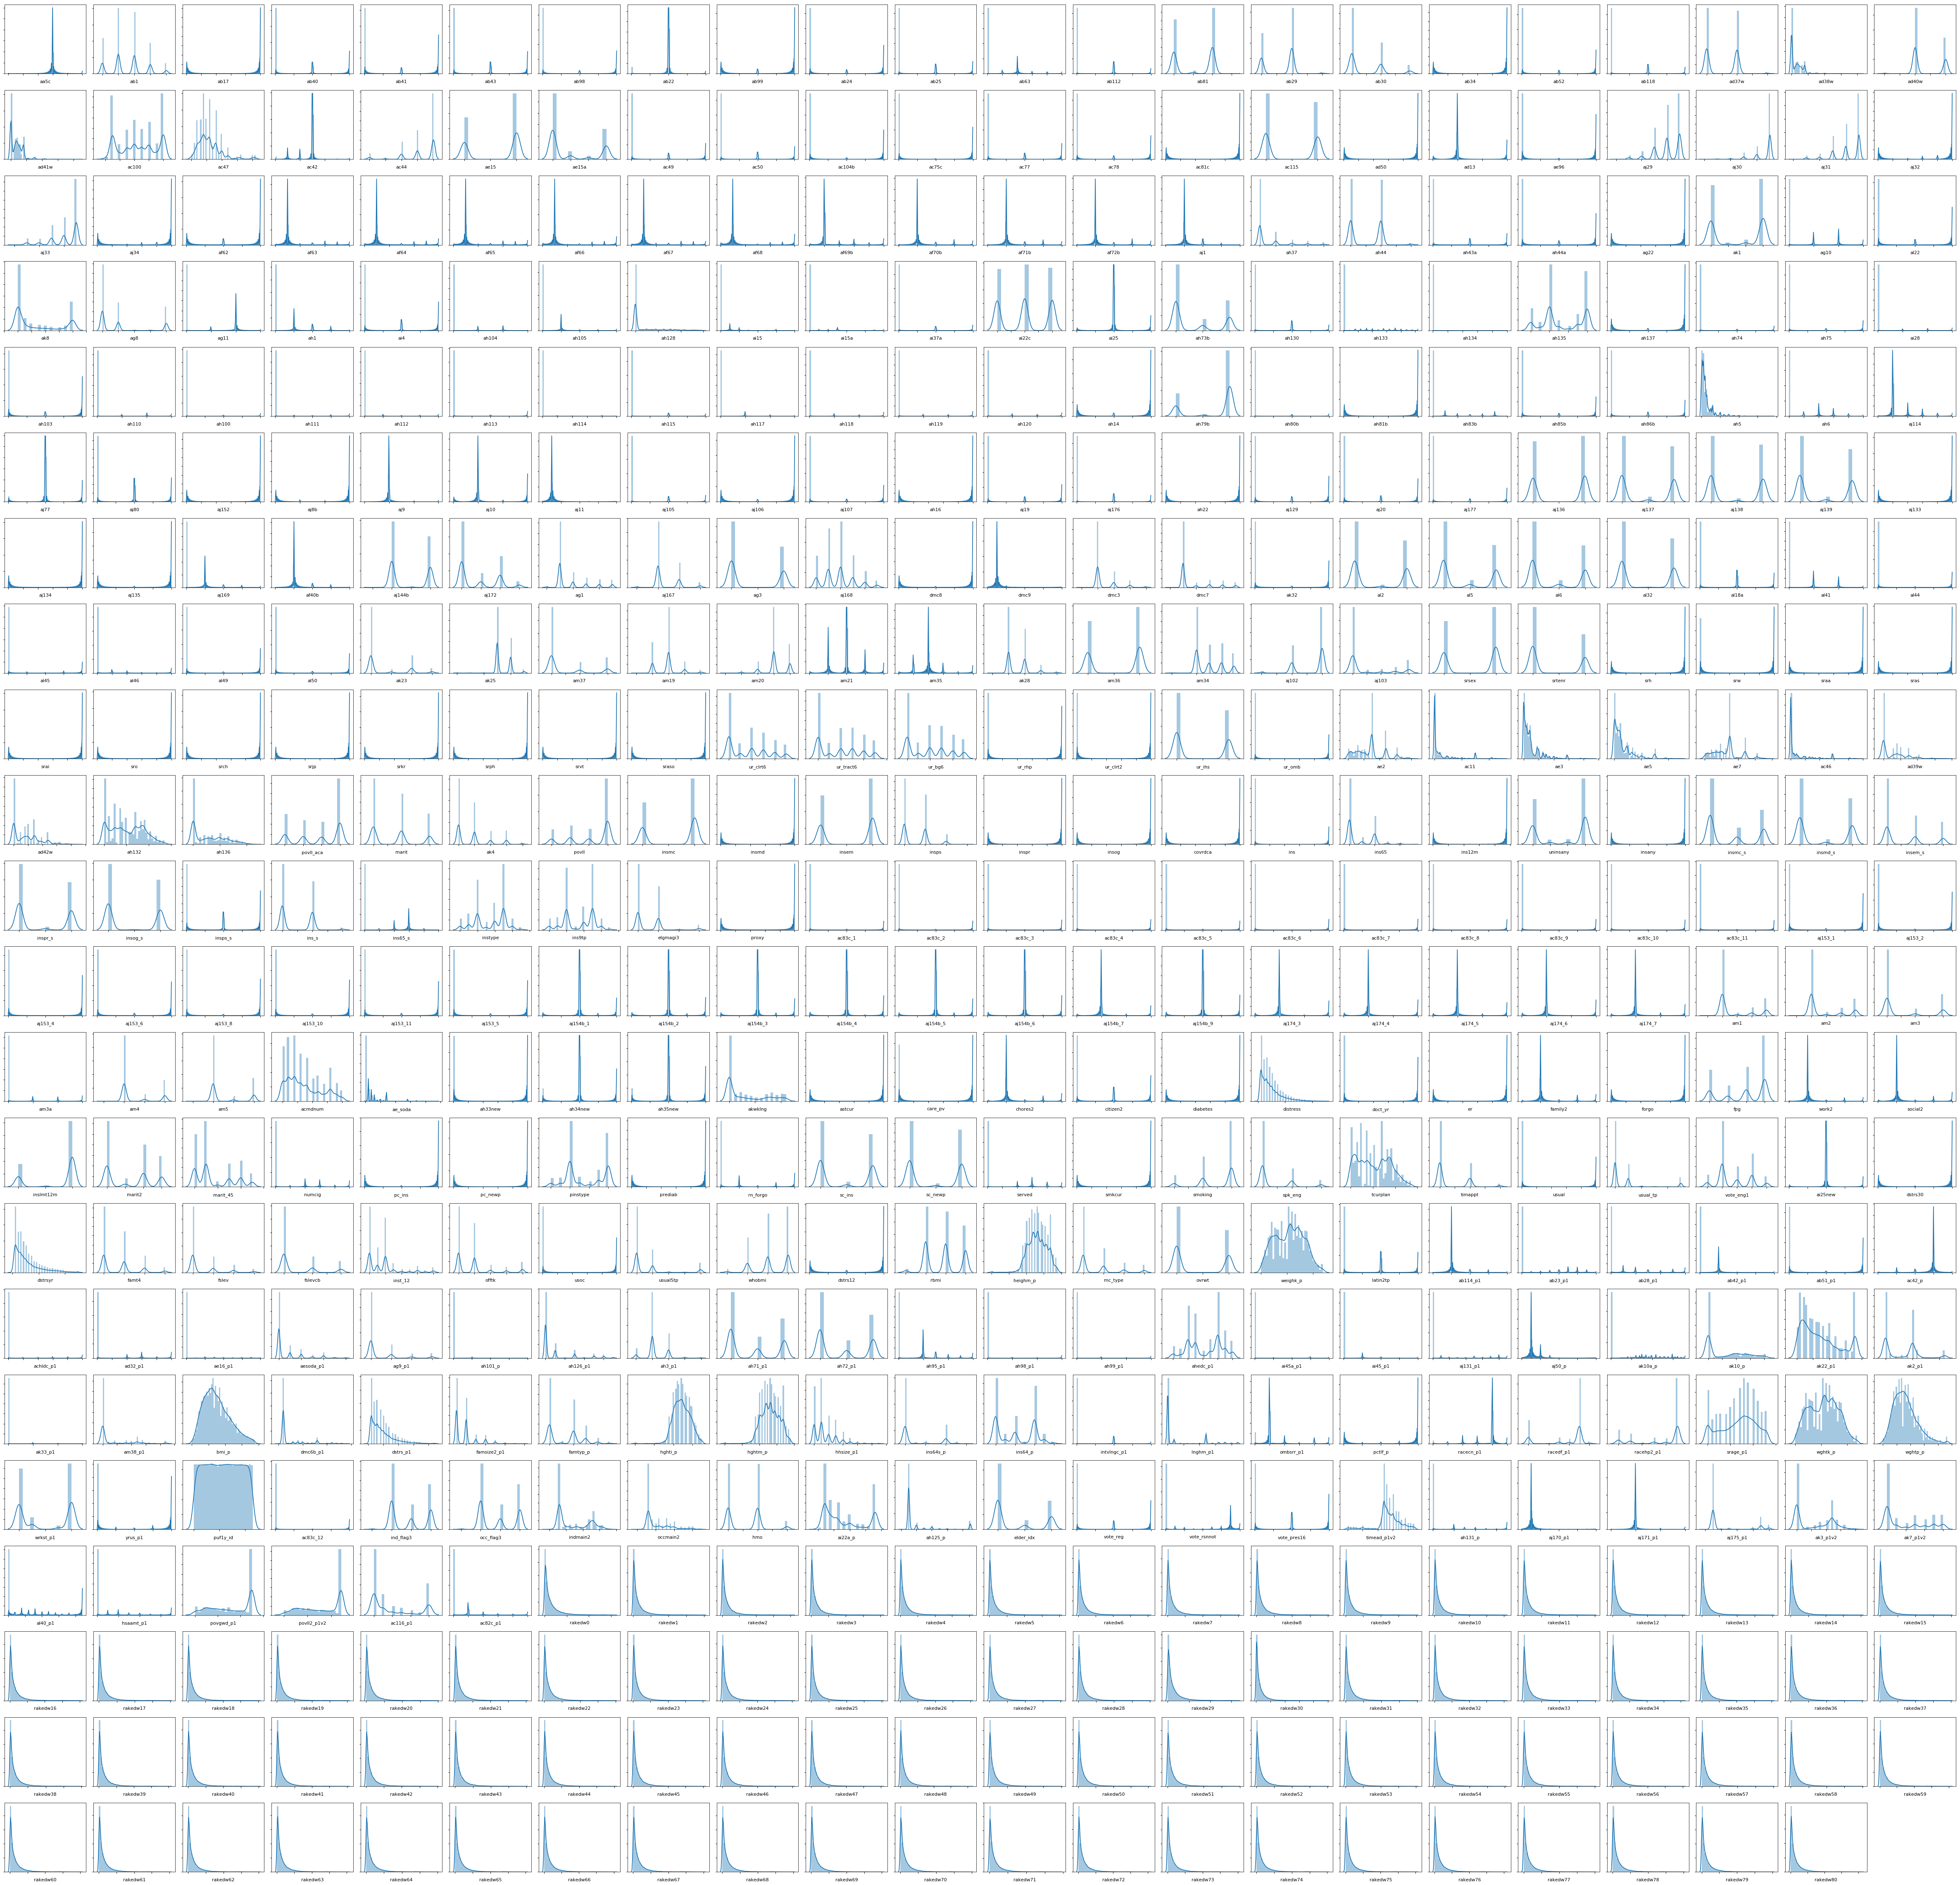

In [14]:
plot_histograms(df[tuple(number_col_names)])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

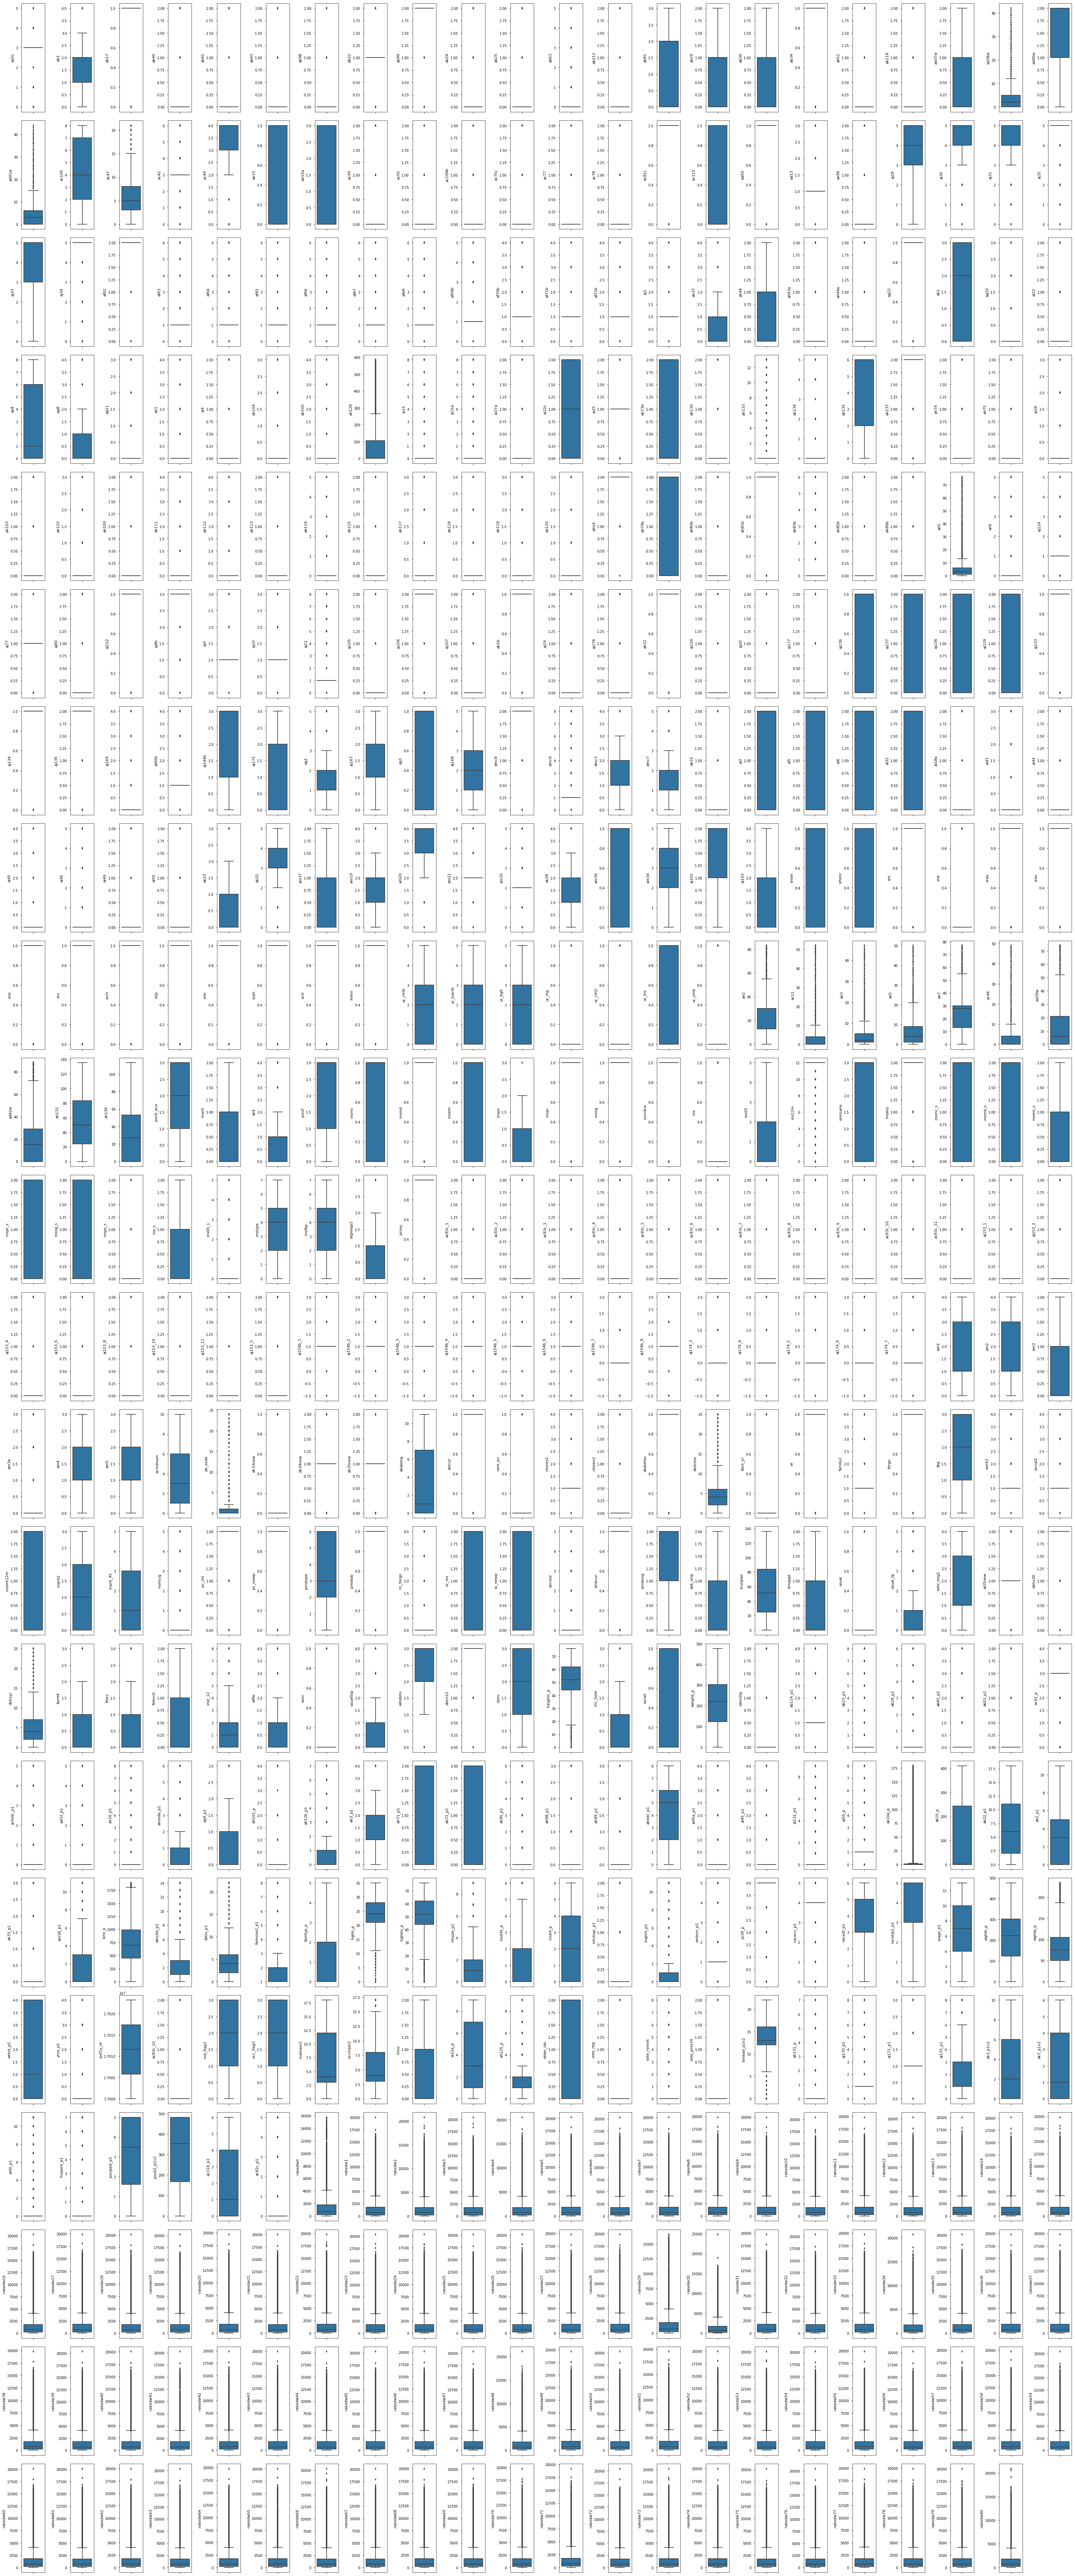

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

# Nulls


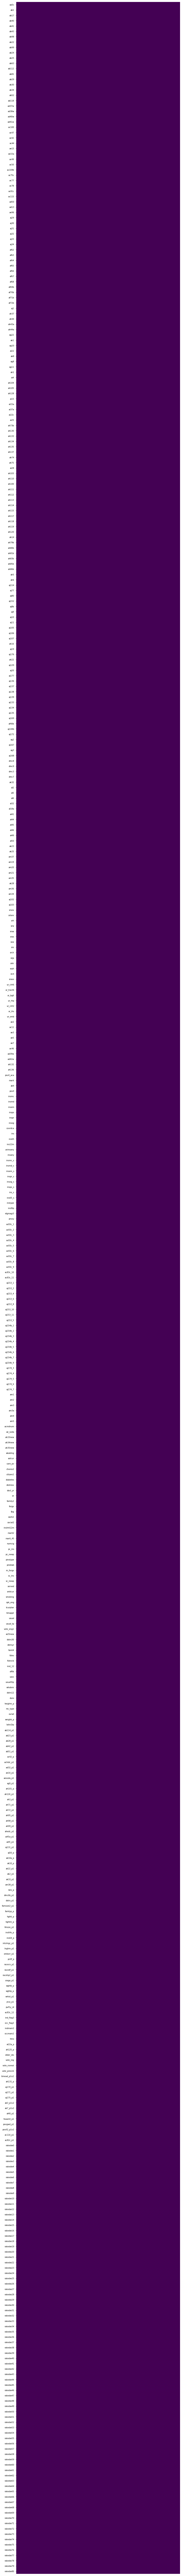

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )